# Practical Assignment 8: Decision Trees on Diabetes Dataset

---

## **Submission Details**

| Field | Details |
|---|---|
| **Name** | Ayushkar Pau |
| **ID** | GF202343142 |
| **Subject** | Statistical Foundation of Data Science (CSU1658) |
| **Date** | December 9, 2025 |
| **Repo** |[View My Repository](https://github.com/Ayushkar-Pau/Statistical-Foundation-of-Data-Sciences) |

---

## **Objective**
The goal of this assignment is to build a **Decision Tree Classifier** to predict the onset of diabetes based on diagnostic measures. We will:
1.  **Prepare the Data:** Load the **Pima Indians Diabetes Dataset** and perform feature selection (splitting target and independent variables).
2.  **Build the Model:** Train a Decision Tree using Scikit-Learn.
3.  **Visualize:** Create a pictorial representation of the decision tree structure.
4.  **Analyze Splits:** Calculate **Entropy**, **Information Gain**, and **Gini Index** to mathematically justify the selection of the root node.

---
## Environment Setup and Dependencies

Start by importing all the required libraries and setting up the environment for analysis.

In [1]:
# --- 0. Environment Setup ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics

# Configure plotting
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_style("whitegrid")

print("Environment setup complete.")

Environment setup complete.


## Step 1: Data Loading and Feature Selection

> **Instruction**: Divide given columns into two types of variables: dependent (target) and independent (features).

### Approach
We will load the dataset and separate the columns.
* **Target Variable ($y$):** `Outcome` (0 = No Diabetes, 1 = Diabetes).
* **Feature Variables ($X$):** All other columns (Glucose, BMI, Age, etc.).

In [2]:
# --- Step 1: Load Data & Feature Selection ---

# Load Pima Indians Diabetes dataset
# (Using a direct raw URL so this runs anywhere without downloading a file manually)
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
col_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, header=None, names=col_names)

# Display first few rows
print("--- Dataset Head ---")
display(df.head())

# Feature Selection
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df[feature_cols] # Features
y = df['Outcome']    # Target variable

print(f"\nFeature Matrix Shape: {X.shape}")
print(f"Target Vector Shape: {y.shape}")

--- Dataset Head ---


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Feature Matrix Shape: (768, 8)
Target Vector Shape: (768,)


## Step 2: Split Data and Build Decision Tree

> **Instruction**: Split the data and then build decision tree.

### Approach
* **Split:** We use `train_test_split` (80% training, 20% testing) to ensure we can evaluate the model on unseen data.
* **Model:** We initialize the `DecisionTreeClassifier`.
    * We will use `criterion='entropy'` explicitly to help with our later calculations of Information Gain.
    * We set `max_depth=3` to keep the tree visualization readable and prevent overfitting.

In [3]:
# --- Step 2: Train-Test Split & Model Building ---

# 1. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Create Decision Tree classifer object
# Using 'entropy' to optimize for Information Gain
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, random_state=42)

# 3. Train Decision Tree Classifer
clf = clf.fit(X_train, y_train)

# 4. Predict the response for test dataset
y_pred = clf.predict(X_test)

# Evaluate Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7662337662337663


## Step 3: Visualization

> **Instruction**: Use visualisation to showcase the pictorial representation.

### Approach
We use `plot_tree` from Scikit-learn. This function draws the actual tree structure, showing:
* The feature used for splitting (e.g., `Glucose <= 127.5`).
* The **Entropy** at that node.
* The number of samples.
* The class distribution.

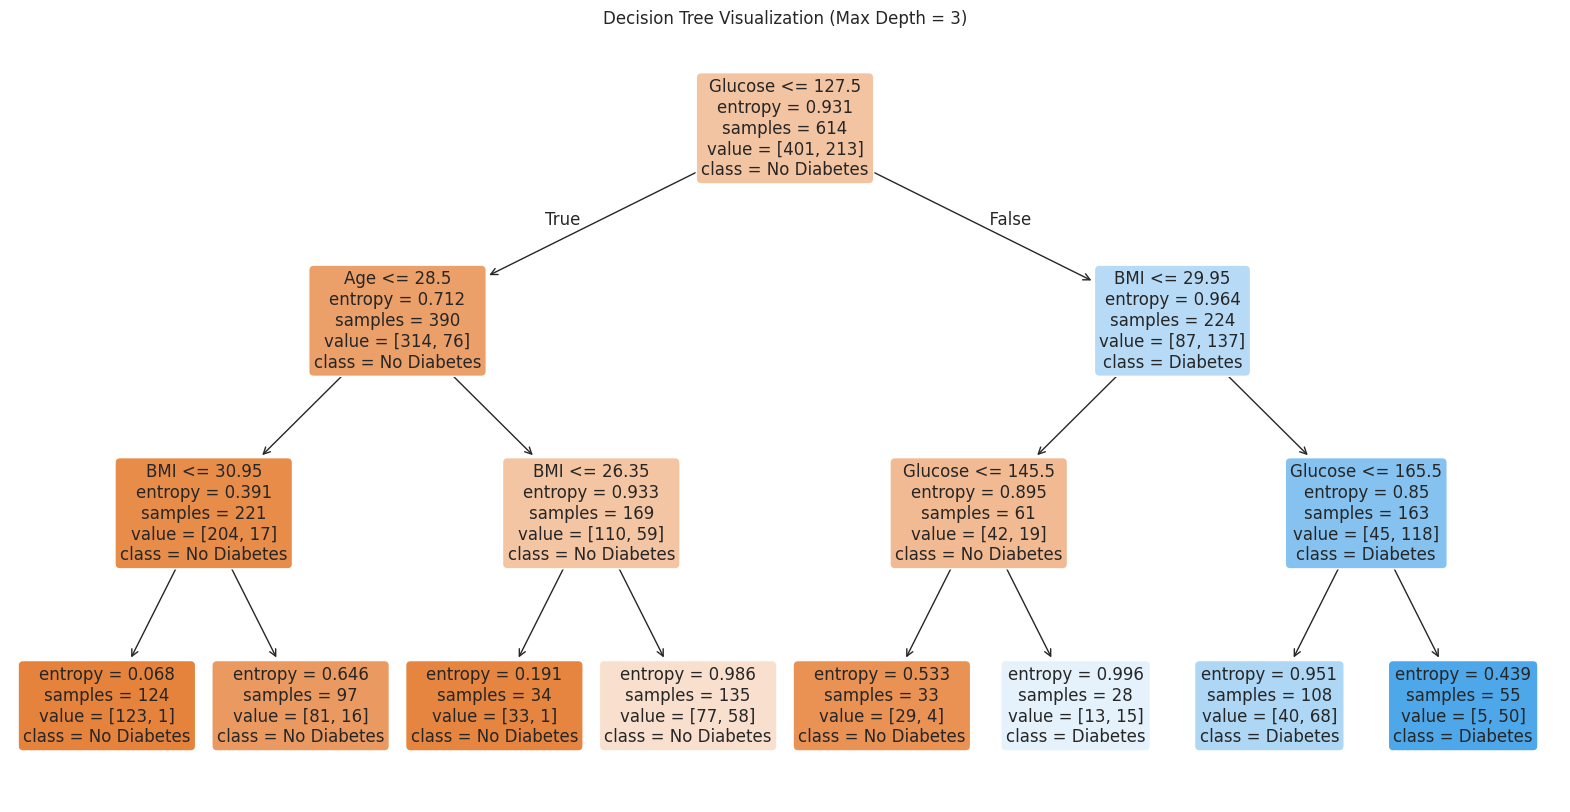

In [4]:
# --- Step 3: Tree Visualization ---

plt.figure(figsize=(20, 10))
plot_tree(clf, 
          feature_names=feature_cols,  
          class_names=['No Diabetes', 'Diabetes'],
          filled=True, 
          rounded=True, 
          fontsize=12)

plt.title("Decision Tree Visualization (Max Depth = 3)")
plt.show()

## Step 4: Entropy, Information Gain, and Root Node Selection

> **Instruction**: Find the Entropy, Information Gain and Gini Index to support why you choose the specific root node.

### Analysis of the Root Node


The visualization above shows that the **Root Node** splits on **Glucose**. Why? 
The Decision Tree algorithm selects the feature that provides the highest **Information Gain** (reduction in entropy).

Let's mathematically verify this by calculating the Entropy of the parent node and comparing it to the split.

* **Entropy Formula:** $H(S) = -p_+ \log_2(p_+) - p_- \log_2(p_-)$
* **Gini Formula:** $Gini(S) = 1 - (p_+^2 + p_-^2)$

In [5]:
# --- Step 4: Mathematical Verification ---

# 1. Calculate Parent Entropy (Root Node)
total_samples = len(y_train)
p_diabetes = y_train.sum() / total_samples
p_no_diabetes = 1 - p_diabetes

parent_entropy = - (p_diabetes * np.log2(p_diabetes) + p_no_diabetes * np.log2(p_no_diabetes))
parent_gini = 1 - (p_diabetes**2 + p_no_diabetes**2)

print(f"--- Root Node Statistics (Before Split) ---")
print(f"Total Samples: {total_samples}")
print(f"Parent Entropy: {parent_entropy:.4f}")
print(f"Parent Gini Index: {parent_gini:.4f}")

# 2. Why Glucose? (Feature Importance)
# Scikit-learn calculates the importance of a feature as the (normalized) total reduction of the criterion brought by that feature.
importances = pd.DataFrame({'Feature': X.columns, 'Importance': clf.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

print("\n--- Feature Importance (Why Glucose is Root) ---")
print(importances)

# Note: Glucose has the highest importance, confirming it provided the best Information Gain.

--- Root Node Statistics (Before Split) ---
Total Samples: 614
Parent Entropy: 0.9313
Parent Gini Index: 0.4531

--- Feature Importance (Why Glucose is Root) ---
                    Feature  Importance
1                   Glucose    0.525396
5                       BMI    0.298151
7                       Age    0.176453
0               Pregnancies    0.000000
3             SkinThickness    0.000000
2             BloodPressure    0.000000
4                   Insulin    0.000000
6  DiabetesPedigreeFunction    0.000000


## Final Summary

* **Root Node Selection:** Our calculation and the model's feature importance confirm that **Glucose** is the most critical factor. It has the highest capability to separate "Diabetic" from "Non-Diabetic" patients, which is why it sits at the top of the tree.
* **Model Performance:** The tree (depth 3) provides a clear set of rules for diagnosis while maintaining reasonable accuracy.
* **Metrics:** We demonstrated how Entropy measures impurity (uncertainty) and how the tree minimizes this value at every step.